In [5]:
%pip install requests pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Manipulation sur le fichier "data.json" du projet précédent

In [1]:
import os

# Chemin du dossier contenant le fichier
dossier = "Projet Hunter"

# Ancien et nouveau noms de fichier
ancien_nom = "data.json"
nouveau_nom = "default_dataset.json"

# Chemins complets des fichiers
chemin_ancien = os.path.join(dossier, ancien_nom)
chemin_nouveau = os.path.join(dossier, nouveau_nom)

# Renommer le fichier
try:
    os.rename(chemin_ancien, chemin_nouveau)
    print(f"Le fichier a été renommé de {ancien_nom} à {nouveau_nom}")
except OSError as e:
    print(f"Erreur lors du renommage du fichier: {e}")


Le fichier a été renommé de data.json à default_dataset.json


In [9]:
import json

# Chemin vers le fichier JSON
json_file_path = 'Projet Hunter/default_dataset.json'

# Lire le fichier JSON
with open(json_file_path, 'r') as file:
    json_data = json.load(file)

# Afficher le type des données chargées
print(f"Type des données : {type(json_data)}")

# Afficher une partie des données pour comprendre leur structure
# Utiliser une condition pour vérifier si les données sont de type dictionnaire ou liste
if isinstance(json_data, dict):
    # Afficher les clés du dictionnaire et un extrait de chaque valeur
    for key in json_data:
        print(f"Clé : {key}, Extrait des données : {json_data[key][:10]}")
elif isinstance(json_data, list):
    # Si c'est une liste, afficher les 10 premiers éléments
    print(json_data[:10])


Type des données : <class 'dict'>
Clé : columns, Extrait des données : ['winning_bid_max', 'winning_bid_min', 'winning_bid_mean', 'trading_volume', 'lots_count', 'name']
Clé : index, Extrait des données : [['8_doors', '2023-09-01'], ['8_doors', '2023-08-01'], ['8_doors', '2023-07-01'], ['8_doors', '2023-06-01'], ['8_doors', '2022-10-01'], ['8_doors', '2022-08-01'], ['8_doors', '2022-04-01'], ['8_doors', '2022-03-01'], ['8_doors', '2022-01-01'], ['8_doors', '2018-01-01']]
Clé : data, Extrait des données : [[35.0, 35.0, 35.0, 35.0, 1, '8 Doors Distillery'], [45.0, 25.0, 39.5, 197.5, 3, '8 Doors Distillery'], [27.5, 27.5, 27.5, 27.5, 1, '8 Doors Distillery'], [20.0, 12.5, 16.5, 49.5, 1, '8 Doors Distillery'], [80.0, 65.0, 72.5, 145.0, 2, '8 Doors Distillery'], [94.6, 94.6, 94.6, 94.6, 1, '8 Doors Distillery'], [47.0, 47.0, 47.0, 47.0, 1, '8 Doors Distillery'], [47.0, 47.0, 47.0, 47.0, 1, '8 Doors Distillery'], [31.0, 31.0, 31.0, 31.0, 1, '8 Doors Distillery'], [17.52, 17.52, 17.52, 17.52,

In [10]:
import pandas as pd

# Extraction des composants du JSON
columns = json_data['columns']
data = json_data['data']
index = json_data['index']

# Création du DataFrame
df = pd.DataFrame(data, columns=columns)

# Optionnel : Définir un index multi-niveaux si nécessaire
df.set_index([pd.Index([i[0] for i in index], name='Slug'), 
              pd.Index([i[1] for i in index], name='Date')], inplace=True)

# Afficher le DataFrame pour vérifier la structure
print(df.head())


                    winning_bid_max  winning_bid_min  winning_bid_mean  \
Slug    Date                                                             
8_doors 2023-09-01             35.0             35.0              35.0   
        2023-08-01             45.0             25.0              39.5   
        2023-07-01             27.5             27.5              27.5   
        2023-06-01             20.0             12.5              16.5   
        2022-10-01             80.0             65.0              72.5   

                    trading_volume  lots_count                name  
Slug    Date                                                        
8_doors 2023-09-01            35.0           1  8 Doors Distillery  
        2023-08-01           197.5           3  8 Doors Distillery  
        2023-07-01            27.5           1  8 Doors Distillery  
        2023-06-01            49.5           1  8 Doors Distillery  
        2022-10-01           145.0           2  8 Doors Distillery 

       winning_bid_max  winning_bid_min  winning_bid_mean  trading_volume  \
count     3.781800e+04     37818.000000      37818.000000    3.781800e+04   
mean      2.066264e+03        46.075400        188.205933    2.028552e+04   
std       1.836260e+04       197.765731        390.048804    1.455409e+05   
min       0.000000e+00         0.000000          0.000000    0.000000e+00   
25%       1.350000e+02         5.000000         69.122500    3.440000e+02   
50%       3.240000e+02        14.700000        114.465000    1.657750e+03   
75%       8.361500e+02        40.000000        194.467500    7.190500e+03   
max       1.200000e+06     17000.000000      17000.000000    6.954005e+06   

         lots_count  
count  37818.000000  
mean      57.871648  
std      186.594626  
min        1.000000  
25%        4.000000  
50%       13.000000  
75%       44.000000  
max     6873.000000  
Moyenne de winning_bid_max: 2066.2637244169446
Médiane de winning_bid_max: 324.0
Écart-type de winning_bid_m

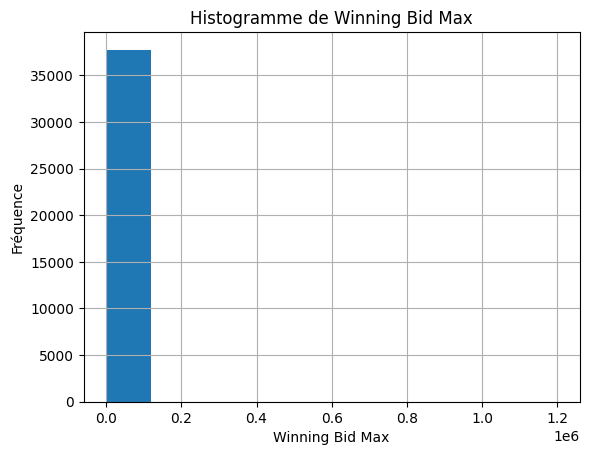

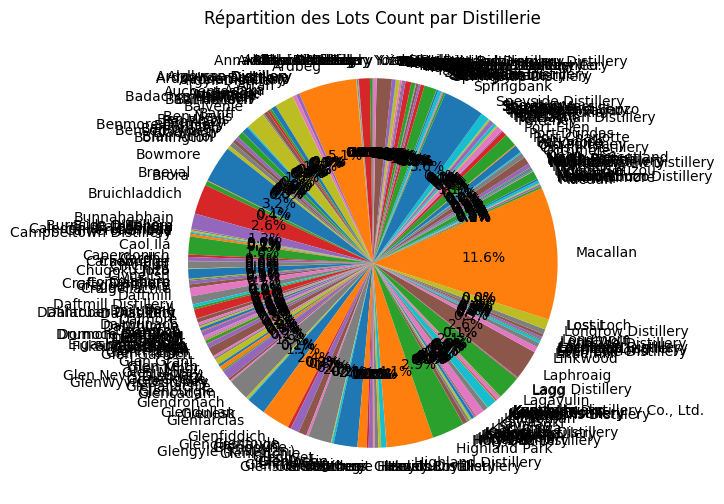

In [12]:
# Statistiques descriptives
print(df.describe())

# Moyenne, Médiane, Écart-type pour 'winning_bid_max'
print("Moyenne de winning_bid_max:", df['winning_bid_max'].mean())
print("Médiane de winning_bid_max:", df['winning_bid_max'].median())
print("Écart-type de winning_bid_max:", df['winning_bid_max'].std())

# Groupement par 'name' et calcul de la moyenne pour 'winning_bid_max'
grouped = df.groupby('name')['winning_bid_max'].mean()
print(grouped)

# Pour la visualisation, vous pouvez utiliser Matplotlib ou Seaborn
# Par exemple, créer un histogramme des 'winning_bid_max'
import matplotlib.pyplot as plt

df['winning_bid_max'].hist()
plt.title('Histogramme de Winning Bid Max')
plt.xlabel('Winning Bid Max')
plt.ylabel('Fréquence')
plt.show()
# Calculer la somme des 'lots_count' pour chaque 'name'
lots_count_sum = df.groupby('name')['lots_count'].sum()

# Créer un graphique en secteurs
plt.figure(figsize=(10, 6))
lots_count_sum.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Répartition des Lots Count par Distillerie')
plt.ylabel('')  # Supprimer le label y
plt.show()
